<a href="https://colab.research.google.com/github/Novae28/Machine_learning/blob/main/GRIP_Prediction_using_supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task #1: Predict the percentage of an student based on the no. of study hours.

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the given data set with pandas

In [ ]:
stud_data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
stud_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Initial impressions of the data

In [ ]:
stud_data.shape #returns a tuple which denotes number of rows and number of columns

(25, 2)

In [ ]:
stud_data.dtypes #tells what are the data types of the values in each column

Hours     float64
Scores      int64
dtype: object

In [ ]:
stud_data.describe() #shows the mathematical sumummary of the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
stud_data.info() #shows the summary of the data, including number of not null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


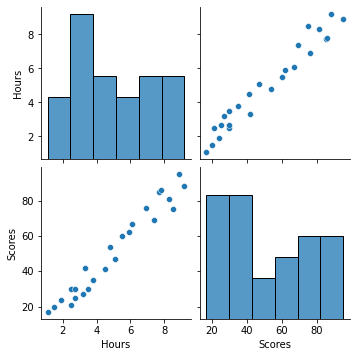

In [ ]:
import seaborn as sns
sns.pairplot(stud_data)

From the plot above, we can easily interpret that the given data follows a linear trend.

Getting the data ready for the regression model

In [ ]:
#importing important libraries
#here we are going to use linear regression along with Lasso regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score #to evaluate the model
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split

In [ ]:
X=stud_data.iloc[:,:-1].values #assigns all the columns except the last one
y=stud_data.iloc[:,-1].values # assigns the last column (Score column)

In [ ]:
#splitting the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)

Trying out simple linear regression

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

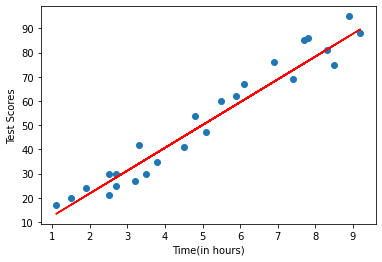

In [ ]:
#plotting the regression line
line = lr.coef_*X+lr.intercept_
plt.scatter(X, y)
plt.plot(X, line,color = 'red');
plt.xlabel("Time(in hours)")
plt.ylabel("Test Scores")
plt.show() 

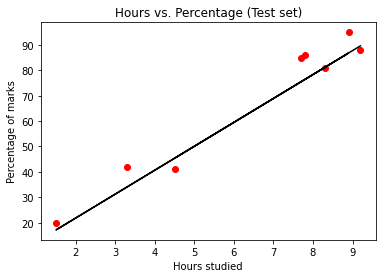

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, lr.predict(X_test), color = 'black')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

Error Metrics

In [ ]:
#finding the r2 score of the model
score = r2_score(y_test, y_pred)
print(score) 
mean_abs_err=mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',mean_abs_err)

0.9393343640876535
Mean Absolute Error: 5.521431556691904


Our vanilla linear regression model did a great job!

Trying the lasso regression

In [ ]:
#lasso regression has a parameter alpha which balances the amount of 
#emphasis given to minimizing RSS vs minimizing sum of square of coefficients
#alpha=0 gives the same results as vanilla linear regression
alphas = np.geomspace(1e-9, 1e0, num=10) #alpha values to find the best fit

for alpha in alphas:
  ls=Lasso(alpha,max_iter=10000)
  ls.fit(X_train,y_train)
  y_pred1=ls.predict(X_test)
  score = r2_score(y_test, y_pred1)
  print(alpha,score)

1e-09 0.939334364081249
1e-08 0.9393343640236099
1e-07 0.9393343634472183
1e-06 0.9393343576833019
1e-05 0.9393343000440549
0.0001 0.9393337236434067
0.001 0.9393279588189589
0.01 0.9392702287780307
0.1 0.9386847487236656
1.0 0.93201198367186


Comparing the actual values with predicted data from linear regression and lasso regression

In [ ]:
#taking the best Lasso model
ls=Lasso(1e-9,max_iter=10000)
ls.fit(X_train,y_train)
y_pred1=ls.predict(X_test)

#making a comparison table
dataset = pd.DataFrame({'Actual': y_test, 'LinearReg': y_pred,'Lasso':y_pred1})  
dataset

,Actual,LinearReg,Lasso
0,88,89.639943,89.639943
1,85,75.516996,75.516996
2,20,17.142148,17.142148
3,42,34.089684,34.089684
4,86,76.458526,76.458526
5,95,86.815354,86.815354
6,81,81.166175,81.166175
7,41,45.388042,45.388042


What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
#for linear regression
testQ = np.array(9.25)
testQ = testQ.reshape(-1, 1)
pred = lr.predict(testQ)
print("The score predicted for 9.25 hours of studies is ",pred)

The score predicted for 9.25 hours of studies is  [90.1107082]


In [ ]:
#for lasso regression
pred = ls.predict(testQ)
print("The score predicted for 9.25 hours of studies is ",pred)

The score predicted for 9.25 hours of studies is  [88.95232652]
